# LTEM Rotation Simulations


In [1]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rho_func(ρ, s_size):
    Θ = np.pi*np.exp(-ρ/s_size) # Change this function for differnt out of plane functions
    return Θ

def phi_func(n_top,ϕ,γ):
    Φ = n_top*ϕ + γ
    return Φ

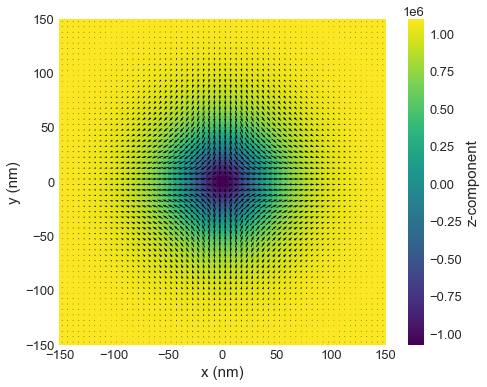

In [28]:
region = df.Region(p1=(-150e-9, -150e-9, -150e-9), p2=(150e-9, 150e-9, 150e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='Box2')

system = mm.System(name='Box2')

system.energy = (mm.Exchange(A=1.6e-11)
                 + mm.DMI(D=4e-3, crystalclass='Cnv')  # 6e-3
                 + mm.Zeeman(H=(0, 0, 1.5e5)))

Ms = 1.1e6


def m_fun(pos):
    x, y, z = pos
    if x**2 + y**2 < (50e-9)**2:
        return (x,y,-1)
    else:
        return (x,y,1)
    
def m_fun_2(pos):
    x, y, z = pos
    phase = 0
    n_top = -1
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    phi = phi_func(n_top,theta,phase)
    rho = rho_func(r, 50e-9)    
    return (np.cos(phi)*np.sin(rho), np.sin(phi)*np.sin(rho), np.cos(rho))

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=m_fun_2, norm=Ms)
system.m.plane('z').mpl()

In [29]:
# NBVAL_IGNORE_OUTPUT
# minimize the energy
md = oc.MinDriver()
md.drive(system)

Running OOMMF (DockerOOMMFRunner) [2021/08/27 14:17]... (25.2 s)


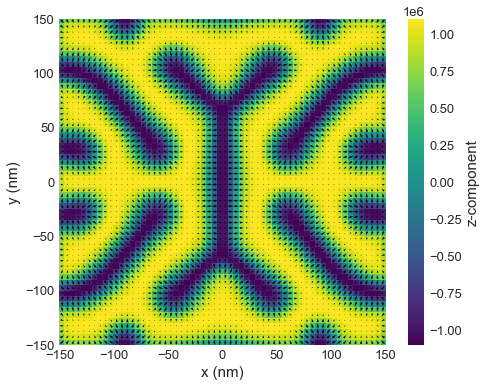

In [30]:
# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

In [33]:
import mag2exp

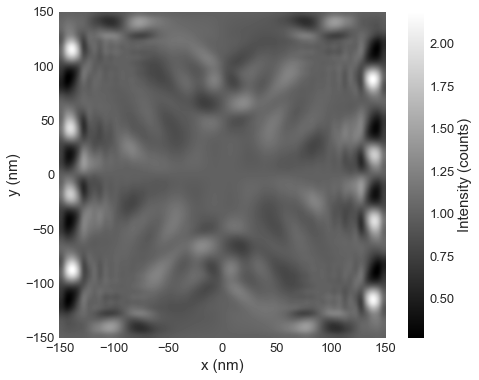

In [41]:
mag2exp.quick_plots.ltem_defocus(system.m, voltage=300e3)

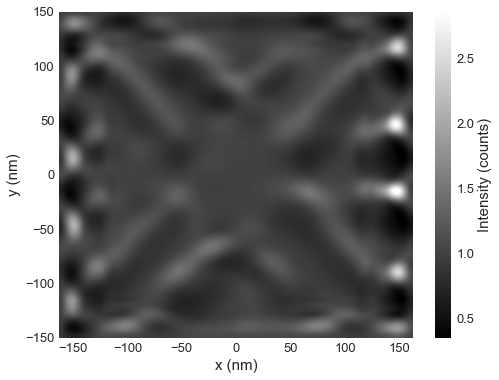

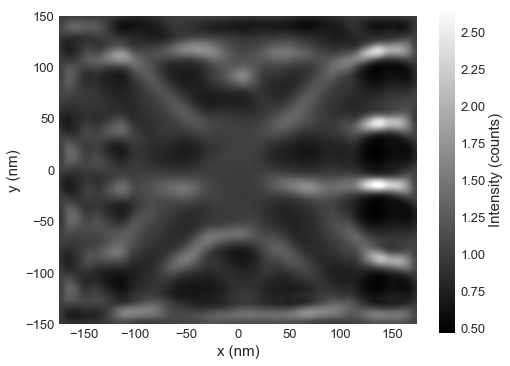

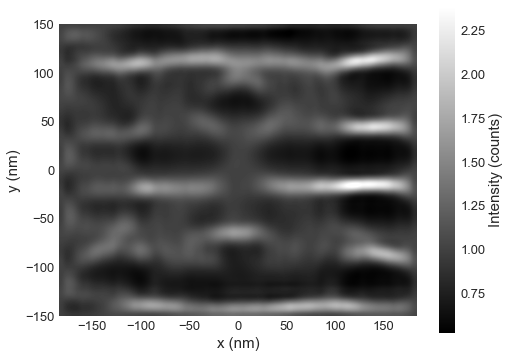

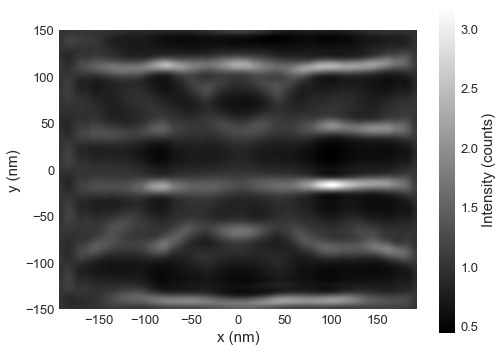

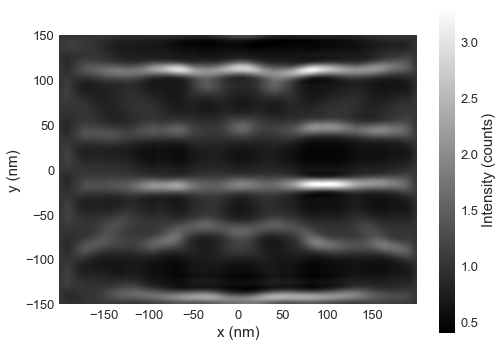

In [42]:
field_rotator = df.FieldRotator(system.m)
for i in range(5):
    field_rotator.rotate(method='from_euler', seq='y', angles=5, degrees=True)
    mag2exp.quick_plots.ltem_defocus(field_rotator.field, voltage=300e3)